<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2.----Interactive-scatterplot..." data-toc-modified-id="2.----Interactive-scatterplot...-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2.    Interactive scatterplot...</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read-in data</a></span></li><li><span><a href="#Read-in-other-variables-of-interest" data-toc-modified-id="Read-in-other-variables-of-interest-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read-in other variables of interest</a></span></li><li><span><a href="#Main-language" data-toc-modified-id="Main-language-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Main language</a></span><ul class="toc-item"><li><span><a href="#Exploring-gender-identity-dataset" data-toc-modified-id="Exploring-gender-identity-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exploring gender identity dataset</a></span></li><li><span><a href="#Exploring-sexual-orientation-dataset" data-toc-modified-id="Exploring-sexual-orientation-dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploring sexual orientation dataset</a></span></li><li><span><a href="#Exploring-language-dataset" data-toc-modified-id="Exploring-language-dataset-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Exploring language dataset</a></span></li><li><span><a href="#Age-and-sex" data-toc-modified-id="Age-and-sex-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Age and sex</a></span></li><li><span><a href="#Ignore-beyond..." data-toc-modified-id="Ignore-beyond...-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Ignore beyond...</a></span></li></ul></li><li><span><a href="#Other-interesting-stuff..." data-toc-modified-id="Other-interesting-stuff...-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Other interesting stuff...</a></span><ul class="toc-item"><li><span><a href="#Percentage-wise" data-toc-modified-id="Percentage-wise-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Percentage-wise</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# 2.	Interactive scatterplot...

Showing the effects of other variables on non-response rates (e.g. speaking another language, non-native to UK, age, urban-rural, etc.)  

a.	Hypothesis is that there are factors that may make people feel they don’t understand the question or may worry that there is a consequence for answering incorrectly. 

b.	Hard to disprove, but a relationship between factors like language or age and non-answering rates may suggest that the questions would benefit from more elaborate discussion or additional materials.  

c.	Not sure how this might graph.


# Read-in data

Import cleaned data. Let's start with gender identity.

In [2]:
df = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/gi_renamed.csv')

In [3]:
df.head()

,LA_code,LA_name,GI_code,GI_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,70588
2,E06000001,Hartlepool,2,Gender identity different from sex registered ...,167
3,E06000001,Hartlepool,3,Trans woman,49
4,E06000001,Hartlepool,4,Trans man,51


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LA_code        2317 non-null   object
 1   LA_name        2317 non-null   object
 2   GI_code        2317 non-null   int64 
 3   GI_categories  2317 non-null   object
 4   Observation    2317 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 90.6+ KB


In [5]:
df.GI_code.unique()

array([-8,  1,  2,  3,  4,  5,  6])

In [6]:
df.GI_categories.unique()

array(['Does not apply',
       'Gender identity the same as sex registered at birth',
       'Gender identity different from sex registered at birth but no specific identity given',
       'Trans woman', 'Trans man', 'All other gender identities',
       'Not answered'], dtype=object)

In [7]:
df.LA_name.nunique()

331

In [8]:
df.head(10)

,LA_code,LA_name,GI_code,GI_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,70588
2,E06000001,Hartlepool,2,Gender identity different from sex registered ...,167
3,E06000001,Hartlepool,3,Trans woman,49
4,E06000001,Hartlepool,4,Trans man,51
5,E06000001,Hartlepool,5,All other gender identities,54
6,E06000001,Hartlepool,6,Not answered,3777
7,E06000002,Middlesbrough,-8,Does not apply,0
8,E06000002,Middlesbrough,1,Gender identity the same as sex registered at ...,106009
9,E06000002,Middlesbrough,2,Gender identity different from sex registered ...,496


In [9]:
# Let's also read in SO data

so = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/so_renamed.csv')

In [10]:
so.head()

,LA_code,LA_name,SO_code,SO_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,Straight or Heterosexual,68070
2,E06000001,Hartlepool,2,Gay or Lesbian,1121
3,E06000001,Hartlepool,3,Bisexual,784
4,E06000001,Hartlepool,4,All other sexual orientations,157


In [11]:
so.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LA_code        1986 non-null   object
 1   LA_name        1986 non-null   object
 2   SO_code        1986 non-null   int64 
 3   SO_categories  1986 non-null   object
 4   Observation    1986 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 77.7+ KB


In [12]:
so.SO_categories.unique()

array(['Does not apply', 'Straight or Heterosexual', 'Gay or Lesbian',
       'Bisexual', 'All other sexual orientations', 'Not answered'],
      dtype=object)

# Read-in other variables of interest

Let's start with language - look at those speaking another language than English

In [13]:
lang = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Language_2021.csv')

In [14]:
lang

,Lower Tier Local Authorities Code,Lower Tier Local Authorities,Main language (detailed) (95 categories) Code,Main language (detailed) (95 categories),Observation
0,E06000001,Hartlepool,-8,Does not apply,2918
1,E06000001,Hartlepool,1,English (English or Welsh in Wales),87544
2,E06000001,Hartlepool,2,Welsh or Cymraeg (in England only),4
3,E06000001,Hartlepool,3,Other UK language: Gaelic (Irish),0
4,E06000001,Hartlepool,4,Other UK language: Gaelic (Scottish),0
...,...,...,...,...,...
31440,W06000024,Merthyr Tydfil,90,African language: Any other African language,4
31441,W06000024,Merthyr Tydfil,91,Sign language: British Sign Language,17
31442,W06000024,Merthyr Tydfil,92,Sign language: Any other sign language,5
31443,W06000024,Merthyr Tydfil,93,Sign language: Any sign communication system,5


In [15]:
lang.rename(columns={'Lower Tier Local Authorities Code':'LA_code', 'Lower Tier Local Authorities':'LA_name', 'Main language (detailed) (95 categories) Code': 'ML_code', 'Main language (detailed) (95 categories)': 'ML_categories'}, inplace=True)

In [16]:
lang.head()

,LA_code,LA_name,ML_code,ML_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,2918
1,E06000001,Hartlepool,1,English (English or Welsh in Wales),87544
2,E06000001,Hartlepool,2,Welsh or Cymraeg (in England only),4
3,E06000001,Hartlepool,3,Other UK language: Gaelic (Irish),0
4,E06000001,Hartlepool,4,Other UK language: Gaelic (Scottish),0


# Main language

## Exploring gender identity dataset

In [17]:
### Gender identity dataset first...

# Let's calculate the GI_category percentages for each local authority

df['Percentages'] = ''


for i in df.LA_code.unique():
    b = df[df.LA_code == i]
    percent = b['Observation'] / b['Observation'].sum() * 100
    df.loc[b.index, 'Percentages'] = percent

In [100]:
# Let's calculate our non-response rate...
# Probably didn't need to do this.. but meh, will clean later!

df['Non-response_rate'] = ''

for i in df.LA_code.unique():
    b = df[df.LA_code == i]
#     print(b.index)
    percent = b['Observation'].where(b['GI_code'] == 6) / b['Observation'].sum() * 100
    df.loc[b.index, 'Non-response_rate'] = percent

In [101]:
# Let's go ahead and select only a subset of our dataframe where our GI_code == 6

not_ans = df[df['GI_code'] == 6]

In [102]:
# Incorporating region - adding it as another column
# Read-in region data

region = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Local_Authority__to_Region.csv')

In [103]:
# Create a key-value dictionary using zip() and a dictionary comprehension
key_value_dict = {key: value for key, value in zip(region['LAD22NM'], region['RGN22NM'])}

# Create a new column titled 'region' and set it to empty
not_ans['region'] = ''


for key, value in key_value_dict.items():
#     Creates a boolean series where key = True
    matching_rows = not_ans['LA_name'] == key
# Use .loc to access the row in which key = True, i.e. where the 'LA_name' column matches the current key
# We then access the region column and set it's value to match the corresponding value for our key.
    not_ans.loc[matching_rows, 'region'] = value
    
    
# Manual matching for those that couldn't be filled in


not_ans.loc[not_ans['LA_name'] == 'Herefordshire', 'region'] = 'West Midlands'
not_ans.loc[not_ans['LA_name'] == 'Kingston upon Hull', 'region'] = 'Yorkshire and The Humber'
not_ans.loc[not_ans['LA_name'] == 'Bristol', 'region'] = 'South West'

# The rest of the LA_names that weren't filled in all belong to the Wales region
# So we subset the dataframe so we only have those rows where the region column is empty
b = not_ans[not_ans.region == '']

# Then we create a list from those unique values
la_names = b.LA_name.unique().tolist()

# We iterate through each value in the list
for i in la_names:
#     Again, we use the same method...
# Creates a boolean series where the rows in LA_name are set to True if they match i
    matching_rows = not_ans['LA_name'] == i
#     Use .loc to access the rows where LA_name matches i
# We then access the region column and set it's value to 'Wales'
    not_ans.loc[matching_rows, 'region'] = 'Wales'

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_87427/3960182255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_ans['region'] = ''


In [104]:
# Sorted not_ans dataframe values by non-response rate, and grabbed the highest 20 values by...
# setting ascending to False and slicing the dataframe 

top20 = not_ans.sort_values(by = 'Non-response_rate', ascending = False)[:20]

# Here we have it.. this can now be plotted
top20

,LA_code,LA_name,GI_code,GI_categories,Observation,Percentages,Non-response_rate,region
1966,E09000005,Brent,6,Not answered,27684,10.061677,10.061677,London
2106,E09000025,Newham,6,Not answered,27527,9.967303,9.967303,London
1308,E07000178,Oxford,6,Not answered,13540,9.903597,9.903597,South East
2015,E09000012,Hackney,6,Not answered,20220,9.653026,9.653026,London
111,E06000016,Leicester,6,Not answered,27963,9.608849,9.608849,East Midlands
2029,E09000014,Haringey,6,Not answered,20137,9.322685,9.322685,London
419,E07000008,Cambridge,6,Not answered,11582,9.283127,9.283127,East of England
2162,E09000033,Westminster,6,Not answered,16367,9.222508,9.222508,London
209,E06000032,Luton,6,Not answered,15827,9.164553,9.164553,East of England
1105,E07000136,Boston,6,Not answered,5181,8.996822,8.996822,East Midlands


### Top 20 LAs by Non-response rate - hued by region (gender identity)

<AxesSubplot: xlabel='Non-response_rate', ylabel='LA_name'>

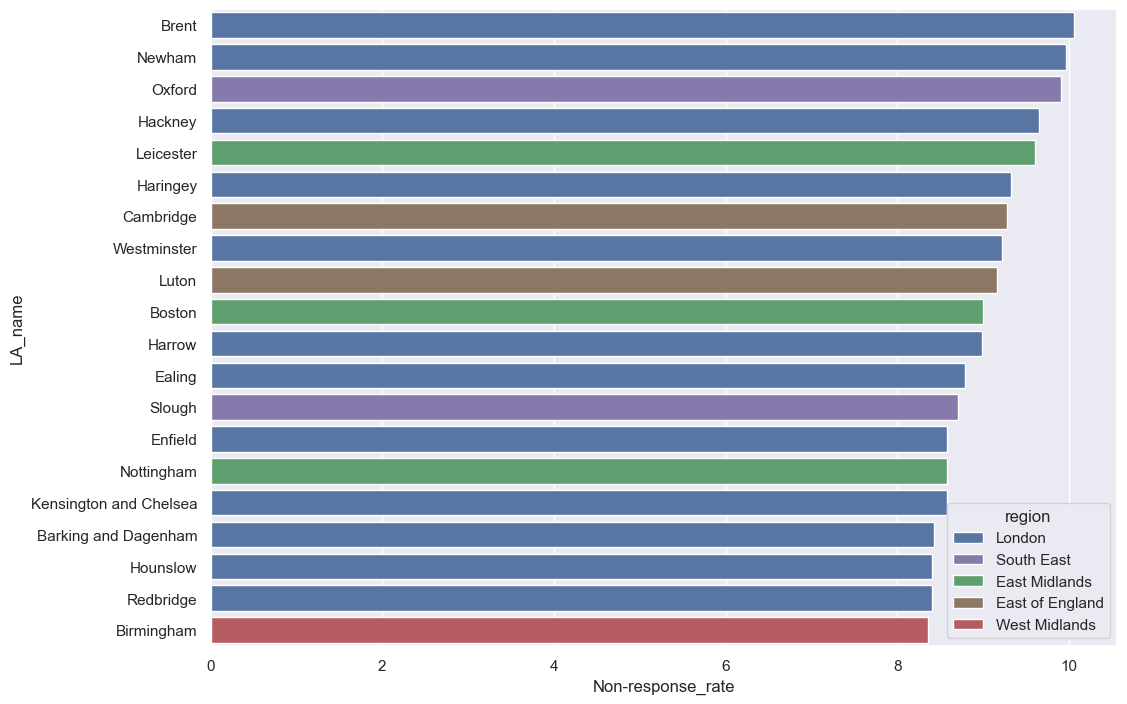

In [130]:
# Initially the graph was very small, so I set the size using figure.figsize
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Simply entered my x value and y value from my top20 dataset, and set the hue to region...

sns.barplot(x = 'Non-response_rate', y = 'LA_name', data = top20, dodge = False, hue = 'region', palette = color_mapping)

## Exploring sexual orientation dataset

In [20]:

# Let's calculate the SO_category percentages for each local authority

so['Percentages'] = ''

for i in so.LA_code.unique():
    b = so[so.LA_code == i]
    percent = (b['Observation'] / b['Observation'].sum() * 100).round(2)
    so.loc[b.index, 'Percentages'] = percent
    
# so['Percentages'] = so.groupby('LA_code')['Observation'].apply(lambda x: x / x.sum() * 100).round(2)

In [57]:
def top10(df, column_name, n):
    
    top_dfs = []
    
    for i in df[column_name].unique():
        if i != 'Does not apply' and i != 'Straight or Heterosexual':
            b = df[df[column_name] == i]
            top_df = b.sort_values(by = 'Percentages', ascending = False)[:n]
            top_dfs.append(top_df)
        
    result_df = pd.concat(top_dfs, ignore_index = True)
        
    return result_df

In [58]:
b = top10(so, 'SO_categories', n = 5)

b

,LA_code,LA_name,SO_code,SO_categories,Observation,Percentages
0,E09000001,City of London,2,Gay or Lesbian,607,7.58
1,E06000043,Brighton and Hove,2,Gay or Lesbian,13726,5.83
2,E09000022,Lambeth,2,Gay or Lesbian,14291,5.31
3,E09000019,Islington,2,Gay or Lesbian,8420,4.59
4,E09000028,Southwark,2,Gay or Lesbian,11596,4.53
5,E07000148,Norwich,3,Bisexual,4700,3.89
6,E07000008,Cambridge,3,Bisexual,4769,3.82
7,E06000043,Brighton and Hove,3,Bisexual,8916,3.79
8,E07000178,Oxford,3,Bisexual,4953,3.62
9,E07000138,Lincoln,3,Bisexual,2974,3.42


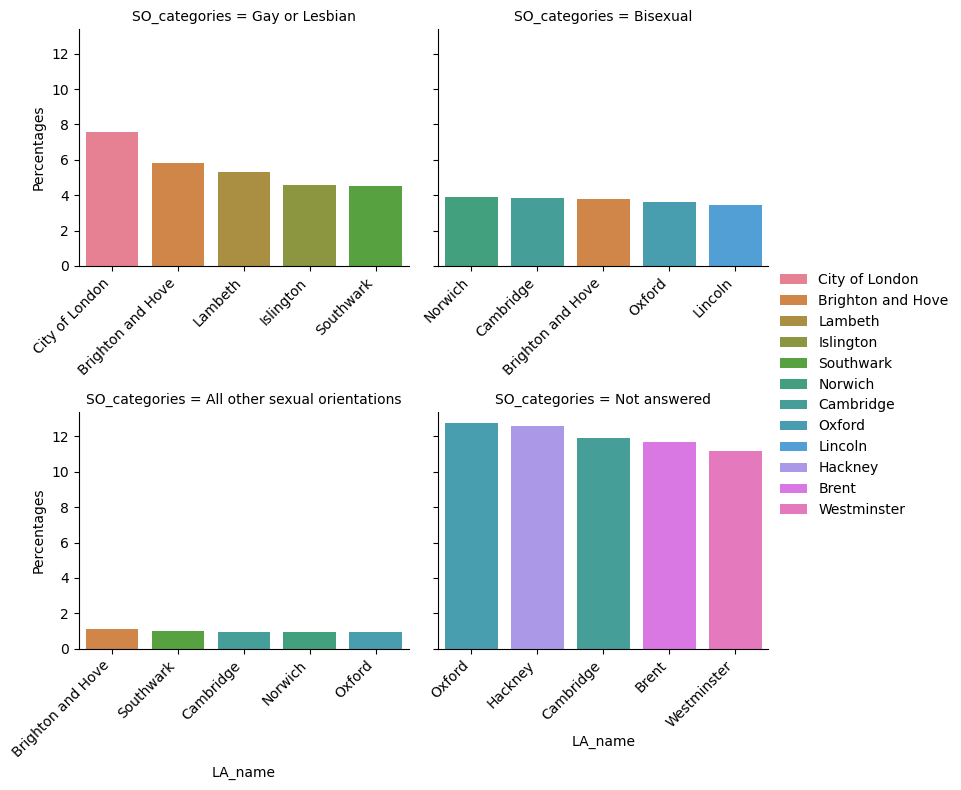

In [85]:
# Create a custom color palette
custom_palette = sns.color_palette("husl", n_colors=b['LA_name'].nunique())

# Create a color mapping dictionary
color_mapping = {LA_name: color for LA_name, color in zip(b['LA_name'].unique(), custom_palette)}
# Create a FacetGrid with subplots for each unique value in the 'SO_categories' column
g = sns.FacetGrid(b, col='SO_categories', col_wrap=2, height=4, aspect=1, sharex = False)

# Define a custom function to be used inside the FacetGrid
def custom_barplot(x, y, **kwargs):
    so_category = kwargs.pop('label')
    order = b[b['SO_categories'] == so_category]['LA_name'].unique()
    
    if len(order) > 0:
        sns.barplot(x=x, y=y, order=order, **kwargs)
    else:
        sns.barplot(x=x, y=y, **kwargs)

# Use the custom function to create bar plots for each SO_category with the correct ordering
g.map(custom_barplot, 'LA_name', 'Percentages', label='SO_categories', hue = b['LA_name'], dodge = False, palette = color_mapping)

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Customize the chart
g.set_axis_labels("LA_name", "Percentages")
g.fig.tight_layout()
g.add_legend()


In [88]:
so.head(10)

,LA_code,LA_name,SO_code,SO_categories,Observation,Percentages
0,E06000001,Hartlepool,-8,Does not apply,0,0.0
1,E06000001,Hartlepool,1,Straight or Heterosexual,68070,91.14
2,E06000001,Hartlepool,2,Gay or Lesbian,1121,1.5
3,E06000001,Hartlepool,3,Bisexual,784,1.05
4,E06000001,Hartlepool,4,All other sexual orientations,157,0.21
5,E06000001,Hartlepool,5,Not answered,4554,6.1
6,E06000002,Middlesbrough,-8,Does not apply,0,0.0
7,E06000002,Middlesbrough,1,Straight or Heterosexual,102027,89.55
8,E06000002,Middlesbrough,2,Gay or Lesbian,1787,1.57
9,E06000002,Middlesbrough,3,Bisexual,1385,1.22


In [90]:
# Let's go ahead and select only a subset of our dataframe where our GI_code == 6

not_ans2 = so[so['SO_code'] == 5]

In [93]:
# Create a key-value dictionary using zip() and a dictionary comprehension
key_value_dict = {key: value for key, value in zip(region['LAD22NM'], region['RGN22NM'])}

# Create a new column titled 'region' and set it to empty
not_ans2['region'] = ''


for key, value in key_value_dict.items():
#     Creates a boolean series where key = True
    matching_rows = not_ans2['LA_name'] == key
# Use .loc to access the row in which key = True, i.e. where the 'LA_name' column matches the current key
# We then access the region column and set it's value to match the corresponding value for our key.
    not_ans2.loc[matching_rows, 'region'] = value
    
    
# Manual matching for those that couldn't be filled in


not_ans2.loc[not_ans2['LA_name'] == 'Herefordshire', 'region'] = 'West Midlands'
not_ans2.loc[not_ans2['LA_name'] == 'Kingston upon Hull', 'region'] = 'Yorkshire and The Humber'
not_ans2.loc[not_ans2['LA_name'] == 'Bristol', 'region'] = 'South West'

# The rest of the LA_names that weren't filled in all belong to the Wales region
# So we subset the dataframe so we only have those rows where the region column is empty
b = not_ans2[not_ans2.region == '']

# Then we create a list from those unique values
la_names = b.LA_name.unique().tolist()

# We iterate through each value in the list
for i in la_names:
#     Again, we use the same method...
# Creates a boolean series where the rows in LA_name are set to True if they match i
    matching_rows = not_ans2['LA_name'] == i
#     Use .loc to access the rows where LA_name matches i
# We then access the region column and set it's value to 'Wales'
    not_ans2.loc[matching_rows, 'region'] = 'Wales'


/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_87427/2395718151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_ans2['region'] = ''


In [113]:
# Sorted not_ans dataframe values by non-response rate, and grabbed the highest 20 values by...
# setting ascending to False and slicing the dataframe 

top20_2 = not_ans2.sort_values(by = 'Percentages', ascending = False)[:20]

# Here we have it.. this can now be plotted
top20_2

,LA_code,LA_name,SO_code,SO_categories,Observation,Percentages,region
1121,E07000178,Oxford,5,Not answered,17411,12.74,South East
1727,E09000012,Hackney,5,Not answered,26384,12.6,London
359,E07000008,Cambridge,5,Not answered,14860,11.91,East of England
1685,E09000005,Brent,5,Not answered,32188,11.7,London
1853,E09000033,Westminster,5,Not answered,19885,11.2,London
1739,E09000014,Haringey,5,Not answered,23733,10.99,London
1775,E09000020,Kensington and Chelsea,5,Not answered,13521,10.98,London
1745,E09000015,Harrow,5,Not answered,22680,10.82,London
1805,E09000025,Newham,5,Not answered,29594,10.72,London
95,E06000016,Leicester,5,Not answered,30847,10.6,East Midlands


### Top 20 LAs by Non-response rate - hued by region (sexuality)

<AxesSubplot: xlabel='Percentages', ylabel='LA_name'>

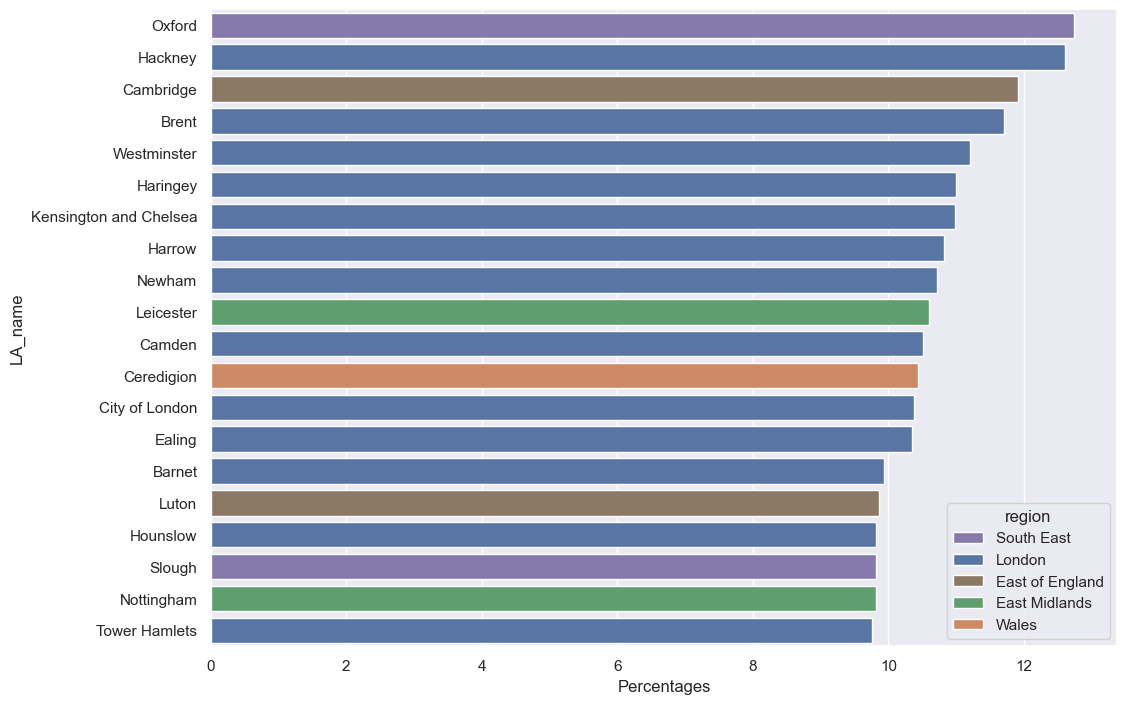

In [129]:
# Create a custom color palette
unique_hue_values = list(set(top20['region'].unique()) | set(top20_2['region'].unique()))
custom_palette = sns.color_palette("deep", n_colors=len(unique_hue_values))

# Create a color mapping dictionary
color_mapping = {hue_value: color for hue_value, color in zip(unique_hue_values, custom_palette)}

# Initially the graph was very small, so I set the size using figure.figsize
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Simply entered my x value and y value from my top20 dataset, and set the hue to region...

sns.barplot(x = 'Percentages', y = 'LA_name', hue = "region", data = top20_2, dodge = False, palette = color_mapping)

## Exploring language dataset

In [131]:
lang['Percentages'] = ''


for i in lang.LA_code.unique():
    b = lang[lang.LA_code == i]
    percent = b['Observation'] / b['Observation'].sum() * 100
    lang.loc[b.index, 'Percentages'] = percent
    
lang['Non-English'] = (lang['ML_code'] != 1) & (lang['ML_code'] != -8)

In [132]:
lang2 = lang[lang['Non-English'] == True]

In [133]:
# Aggregate the data by local authority, summing the 'Observation' column
la_agg = lang2.groupby('LA_name')['Observation'].sum().reset_index()

# Merge the aggregated data with the total number of observations for each local authority
la_totals = lang.groupby('LA_name')['Observation'].sum().reset_index()
la_agg = la_agg.merge(la_totals, on='LA_name', suffixes=('', '_total'))

In [134]:
la_agg 

,LA_name,Observation,Observation_total
0,Adur,1971,64542
1,Allerdale,1073,96154
2,Amber Valley,1850,126207
3,Arun,9469,164889
4,Ashfield,3944,126308
...,...,...,...
326,Wrexham,6682,135116
327,Wychavon,6065,132486
328,Wyre,1376,111944
329,Wyre Forest,2331,101608


In [135]:
# Calculate the percentage of Non-English speakers for each local authority
la_agg['Percentage'] = (la_agg['Observation'] / la_agg['Observation_total']) * 100

In [136]:
# Create a key-value dictionary using zip() and a dictionary comprehension
key_value_dict = {key: value for key, value in zip(region['LAD22NM'], region['RGN22NM'])}

la_agg['region'] = ''


for key, value in key_value_dict.items():
    matching_rows = la_agg['LA_name'] == key
#     print(matching_rows)
    la_agg.loc[matching_rows, 'region'] = value
    
    
# Manual matching for those that couldn't be filled in

# df.loc[df['LA_name'] == [['Kingston upon Hull', 'Herefordshire'], 'region']] = ['Yorkshire and The Humber', 'West Midlands']
la_agg.loc[la_agg['LA_name'] == 'Herefordshire', 'region'] = 'West Midlands'
la_agg.loc[la_agg['LA_name'] == 'Kingston upon Hull', 'region'] = 'Yorkshire and The Humber'
la_agg.loc[la_agg['LA_name'] == 'Bristol', 'region'] = 'South West'

b = la_agg[la_agg.region == '']
la_names = b.LA_name.unique().tolist()

for i in la_names:
    matching_rows = la_agg['LA_name'] == i
#     print(matching_rows)
    la_agg.loc[matching_rows, 'region'] = 'Wales'


In [137]:
# Sort the local authorities based on the percentage of Non-English speakers, in descending order
la_agg_sorted = la_agg.sort_values(by='Percentage', ascending=False)

In [138]:
top20_lang = la_agg_sorted[:30]

In [139]:
top20_lang

,LA_name,Observation,Observation_total,Percentage,region
184,Newham,116570,351029,33.208083,London
30,Brent,110404,339820,32.488965,London
85,Ealing,109501,367117,29.827276,London
126,Harrow,77406,261208,29.633855,London
155,Leicester,106800,368570,28.976856,East Midlands
138,Hounslow,78555,288181,27.258910,London
123,Haringey,69460,264238,26.286908,London
241,Slough,41438,158492,26.145168,South East
292,Tower Hamlets,80621,310304,25.981296,London
315,Westminster,52599,204223,25.755669,London


### Top 20 LAs by % of Non-English as main language

<AxesSubplot: xlabel='Percentage', ylabel='LA_name'>

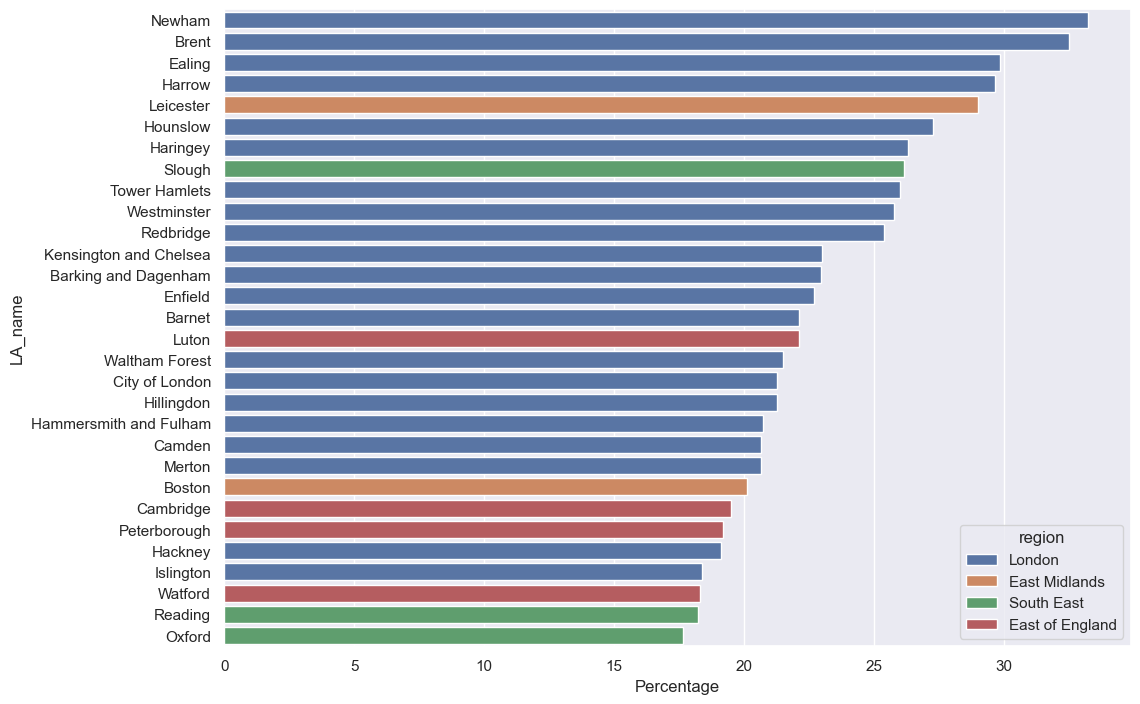

In [140]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Percentage', y = 'LA_name', hue = "region", data = top20_lang, dodge = False)
# plt.xticks(rotation=55)

In [142]:
merged_df2 = not_ans.merge(la_agg, on = ['LA_name'])

# Let's do the same for our SO dataset

merged_df3 = not_ans2.merge(la_agg, on = ['LA_name'])

### Visualisation

#### Gender identity

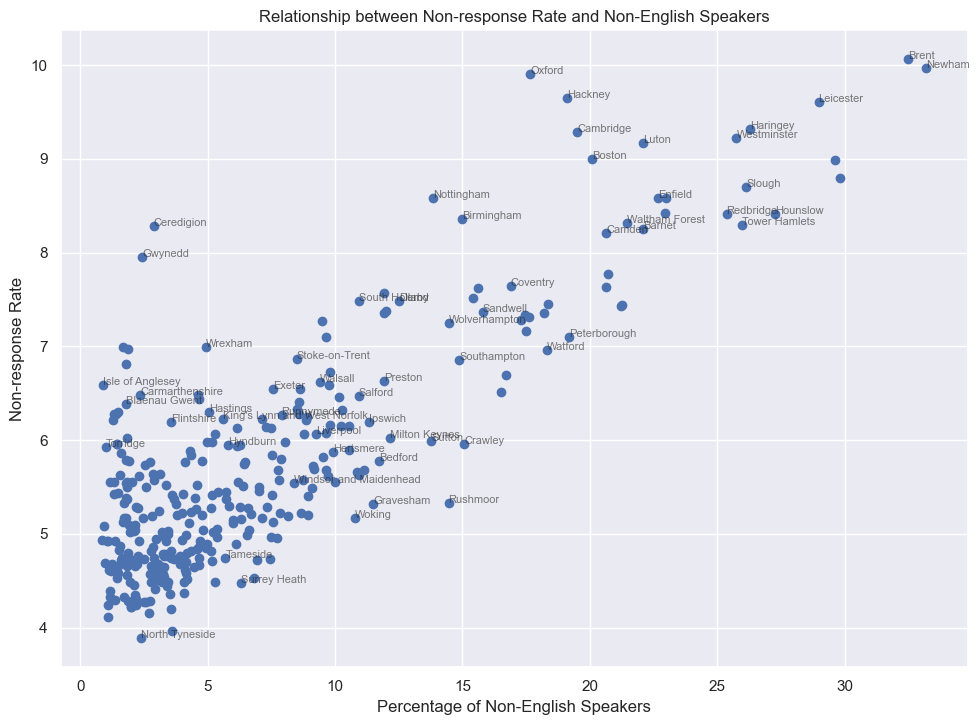

In [143]:
# Create a scatterplot to visualize the relationship between non-response rates and the percentage of non-English speakers
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

plt.scatter(merged_df2['Percentage'], merged_df2['Non-response_rate'])


# Find nearest neighbors
X = merged_df2[['Percentage', 'Non-response_rate']].values
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)
min_distance = 0.3

for i, row in merged_df2.iterrows():
    if distances[i][1] >= min_distance:
        plt.annotate(row['LA_name'], (row['Percentage'], row['Non-response_rate']), fontsize=8, alpha=0.6)

plt.xlabel('Percentage of Non-English Speakers')
plt.ylabel('Non-response Rate')
plt.title('Relationship between Non-response Rate and Non-English Speakers')
plt.show()

In [149]:
# Convert the columns to numeric types if needed
merged_df2['Non-response_rate'] = pd.to_numeric(merged_df2['Non-response_rate'], errors='coerce')
merged_df2['Percentage'] = pd.to_numeric(merged_df2['Percentage'], errors='coerce')


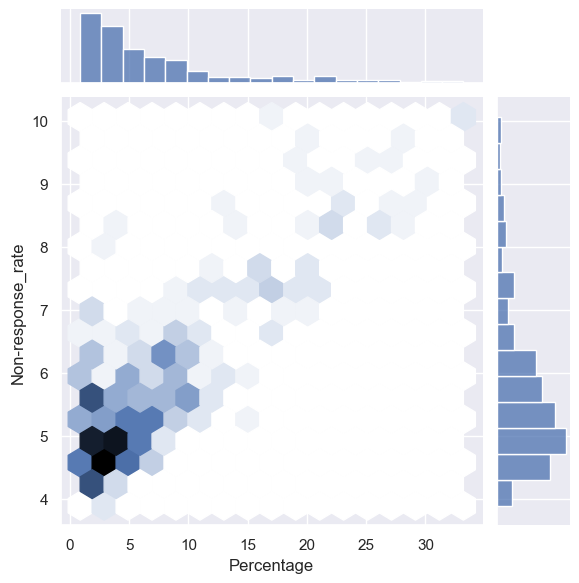

In [150]:
import seaborn as sns

# Create a hexbin plot
sns.jointplot(x='Percentage', y='Non-response_rate', data=merged_df2, kind='hex')

In [154]:
corr_coeff = merged_df2['Non-response_rate'].corr(merged_df2['Percentage'])
print("Correlation Coefficient:", corr_coeff)

# Strong positive linear relationship between our 2 variables.

Correlation Coefficient: 0.8266035274657156


In [157]:
import statsmodels.api as sm

X = merged_df2['Percentage']
y = merged_df2['Non-response_rate']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Non-response_rate   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     709.8
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           3.87e-84
Time:                        10:42:54   Log-Likelihood:                -352.58
No. Observations:                 331   AIC:                             709.2
Df Residuals:                     329   BIC:                             716.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6114      0.057     80.892      0.0

#### Sexuality

In [146]:
merged_df3 = merged_df3.rename(columns={'Percentages': 'Non-response_rate'})
merged_df3.head()

,LA_code,LA_name,SO_code,SO_categories,Observation_x,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y
0,E06000001,Hartlepool,5,Not answered,4554,6.1,North East,1875,92337,2.030605,North East
1,E06000002,Middlesbrough,5,Not answered,8298,7.28,North East,10510,143923,7.302516,North East
2,E06000003,Redcar and Cleveland,5,Not answered,7046,6.27,North East,1460,136533,1.069339,North East
3,E06000004,Stockton-on-Tees,5,Not answered,9268,5.87,North East,5674,196603,2.886019,North East
4,E06000005,Darlington,5,Not answered,5010,5.69,North East,4403,107800,4.084416,North East


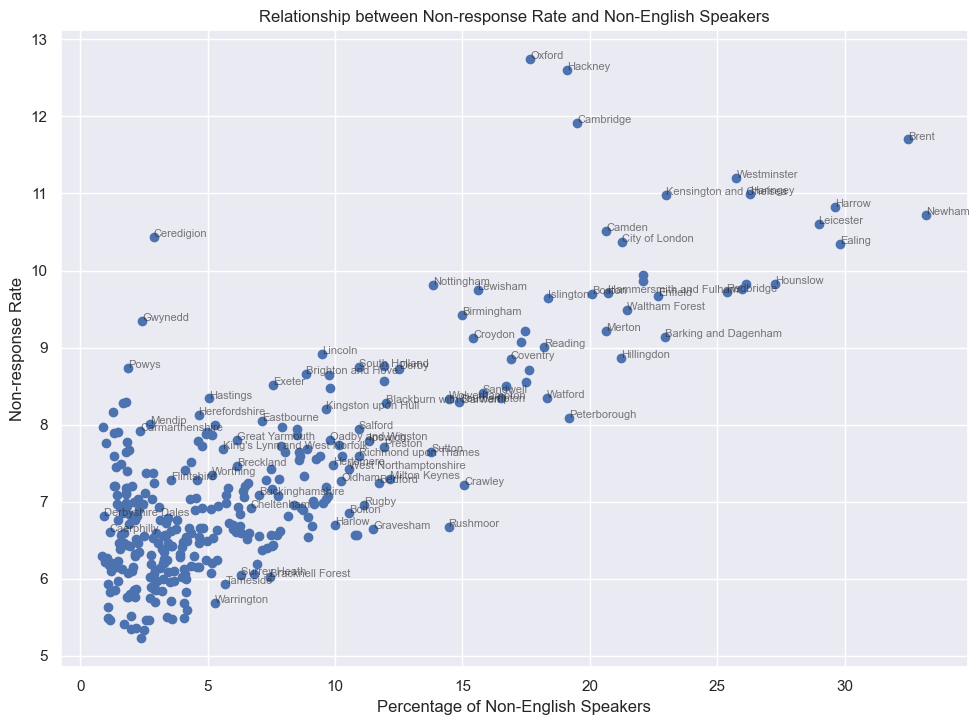

In [147]:


# Create a scatterplot to visualize the relationship between non-response rates and the percentage of non-English speakers
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

plt.scatter(merged_df3['Percentage'], merged_df3['Non-response_rate'])


# Find nearest neighbors
X = merged_df3[['Percentage', 'Non-response_rate']].values
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)
min_distance = 0.3

for i, row in merged_df3.iterrows():
    if distances[i][1] >= min_distance:
        plt.annotate(row['LA_name'], (row['Percentage'], row['Non-response_rate']), fontsize=8, alpha=0.6)

plt.xlabel('Percentage of Non-English Speakers')
plt.ylabel('Non-response Rate')
plt.title('Relationship between Non-response Rate and Non-English Speakers')
plt.show()

In [152]:
# Convert the columns to numeric types if needed
merged_df3['Non-response_rate'] = pd.to_numeric(merged_df2['Non-response_rate'], errors='coerce')
merged_df3['Percentage'] = pd.to_numeric(merged_df2['Percentage'], errors='coerce')

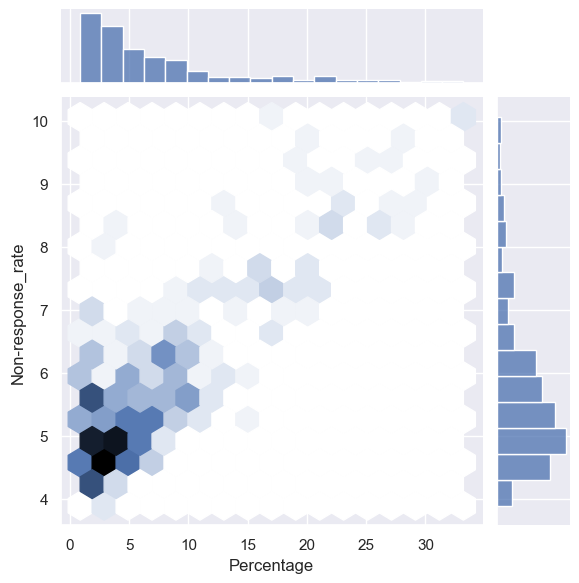

In [153]:
import seaborn as sns

# Create a hexbin plot
sns.jointplot(x='Percentage', y='Non-response_rate', data=merged_df3, kind='hex')

In [156]:
corr_coeff = merged_df3['Non-response_rate'].corr(merged_df3['Percentage'])
print("Correlation Coefficient:", corr_coeff)

# Strong positive linear relationship between our 2 variables.

Correlation Coefficient: 0.8266035274657156


In [159]:
import statsmodels.api as sm

X = merged_df3['Percentage']
y = merged_df3['Non-response_rate']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Non-response_rate   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     709.8
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           3.87e-84
Time:                        10:43:07   Log-Likelihood:                -352.58
No. Observations:                 331   AIC:                             709.2
Df Residuals:                     329   BIC:                             716.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6114      0.057     80.892      0.0

In [160]:
merged_df2.sort_values(by = 'Percentage', ascending = False)

,LA_code,LA_name,GI_code,GI_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y
300,E09000025,Newham,6,Not answered,27527,9.967303,9.967303,London,116570,351029,33.208083,London
280,E09000005,Brent,6,Not answered,27684,10.061677,10.061677,London,110404,339820,32.488965,London
284,E09000009,Ealing,6,Not answered,25979,8.795439,8.795439,London,109501,367117,29.827276,London
290,E09000015,Harrow,6,Not answered,18832,8.983961,8.983961,London,77406,261208,29.633855,London
15,E06000016,Leicester,6,Not answered,27963,9.608849,9.608849,East Midlands,106800,368570,28.976856,East Midlands
...,...,...,...,...,...,...,...,...,...,...,...,...
84,E07000046,Torridge,6,Not answered,3412,5.927728,5.927728,South West,681,68118,0.999736,South West
67,E07000029,Copeland,6,Not answered,2626,4.6887,4.688700,North West,656,67073,0.978039,North West
73,E07000035,Derbyshire Dales,6,Not answered,3102,5.080166,5.080166,East Midlands,658,71542,0.919739,East Midlands
309,W06000001,Isle of Anglesey,6,Not answered,3767,6.591772,6.591772,Wales,622,68876,0.903072,Wales


In [161]:
a = lang[lang['Non-English'] == True]
a.sort_values(by = 'Observation', ascending = False)

,LA_code,LA_name,ML_code,ML_categories,Observation,Percentages,Non-English
1479,E06000016,Leicester,54,South Asian language: Gujarati,44887,12.178691,True
29028,E09000030,Tower Hamlets,53,South Asian language: Bengali (with Sylheti an...,32772,10.561256,True
25034,E08000025,Birmingham,49,South Asian language: Urdu,25131,2.195006,True
26654,E09000005,Brent,54,South Asian language: Gujarati,21513,6.330704,True
28553,E09000025,Newham,53,South Asian language: Bengali (with Sylheti an...,21407,6.098357,True
...,...,...,...,...,...,...,...
8632,E07000065,Wealden,82,African language: Igbo,0,0.0,True
16285,E07000163,Craven,40,Other European language (non-national): Yiddish,0,0.0,True
8634,E07000065,Wealden,84,African language: Luganda,0,0.0,True
8635,E07000065,Wealden,85,African language: Lingala,0,0.0,True


In [162]:
perc = []
names = []

for i in a.ML_categories.unique():
    b = a[a['ML_categories'] == i]
    names.append(i)
    summed = b.Observation.sum()
    perc.append(summed)
    
#     b = df[df.LA_code == i]
#     percent = b['Observation'] / b['Observation'].sum() * 100
#     df.loc[b.index, 'Percentages'] = percent

In [163]:
result = pd.DataFrame(list(zip(names, perc)), columns=['Category', 'Observations'])

In [164]:
result.sort_values(by = 'Observations')

,Category,Observations
3,Other UK language: Manx Gaelic,8
7,Other UK language: Ulster Scots,13
9,Other UK language: Irish Traveller Cant,36
71,North or South American language,71
72,Caribbean Creole: English-based Caribbean Creole,143
...,...,...
11,Portuguese,224720
47,South Asian language: Urdu,269863
49,South Asian language: Panjabi,290745
18,Other European language (EU): Romanian,471952


In [165]:
result['Percentages'] = result['Observations'] / 59597557 * 100

In [166]:
result.sort_values(by = 'Percentages', ascending = False)

,Category,Observations,Percentages
15,Other European language (EU): Polish,611831,1.026604
18,Other European language (EU): Romanian,471952,0.791898
49,South Asian language: Panjabi,290745,0.487847
47,South Asian language: Urdu,269863,0.452809
11,Portuguese,224720,0.377062
...,...,...,...
72,Caribbean Creole: English-based Caribbean Creole,143,0.000240
71,North or South American language,71,0.000119
9,Other UK language: Irish Traveller Cant,36,0.000060
7,Other UK language: Ulster Scots,13,0.000022


## Age and sex

In [ ]:
# !pip install pyjanitor==0.23.1
# !pip install seaborn

In [169]:
age_sex = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Age_sex_GI.xlsx')

In [170]:
age_sex.head()

,England and Wales code,England and Wales label,Gender identity (8 categories) code,Gender identity (8 categories) label,Sex code,Sex label,Age code,Age label,Observation
0,K04000001,England and Wales,1,Gender identity the same as sex registered at ...,1,Female,1,Aged 16 to 24 years,2874920
1,K04000001,England and Wales,2,Gender identity different from sex registered ...,1,Female,1,Aged 16 to 24 years,7220
2,K04000001,England and Wales,3,Trans woman,1,Female,1,Aged 16 to 24 years,3380
3,K04000001,England and Wales,4,Trans man,1,Female,1,Aged 16 to 24 years,8755
4,K04000001,England and Wales,6,All other gender identities,1,Female,1,Aged 16 to 24 years,4590


In [171]:
# Let's get rid of the first 2 columns

age_sex = age_sex.drop(age_sex.columns[[0,1]], axis = 1)

# Can also drop by their name..

# age_sex = age_sex.drop(['England and Wales code', 'England and Wales label'], axis = 1)

In [172]:
age_sex.head()

,Gender identity (8 categories) code,Gender identity (8 categories) label,Sex code,Sex label,Age code,Age label,Observation
0,1,Gender identity the same as sex registered at ...,1,Female,1,Aged 16 to 24 years,2874920
1,2,Gender identity different from sex registered ...,1,Female,1,Aged 16 to 24 years,7220
2,3,Trans woman,1,Female,1,Aged 16 to 24 years,3380
3,4,Trans man,1,Female,1,Aged 16 to 24 years,8755
4,6,All other gender identities,1,Female,1,Aged 16 to 24 years,4590


In [173]:
# Before we split the dataset into 2 so that it's easier to work with...
# Let's clean our column names

from janitor import *

# Clean column names

age_sex = age_sex.clean_names()

In [174]:
age_sex.columns

Index(['gender_identity_8_categories_code',
       'gender_identity_8_categories_label', 'sex_code', 'sex_label',
       'age_code', 'age_label', 'observation'],
      dtype='object')

In [175]:
female = age_sex[age_sex.sex_label == 'Female']
male = age_sex[age_sex.sex_label == 'Male']

In [176]:
# Our observation column contains some string values, so let's convert it to numeric

female['observation'] = pd.to_numeric(female['observation'], errors='coerce')

# Let's calculate the percentage of each observation value within each age group
# We'll store the results in a new column titled 'group_pct'

female['group_pct'] = female.groupby('age_label')['observation'].apply(lambda x: x / x.sum() * 100).round(2)

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_87427/3627212363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['observation'] = pd.to_numeric(female['observation'], errors='coerce')
/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_87427/3627212363.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  female['group_pct'] = female.groupby('age_label')['observation'].apply

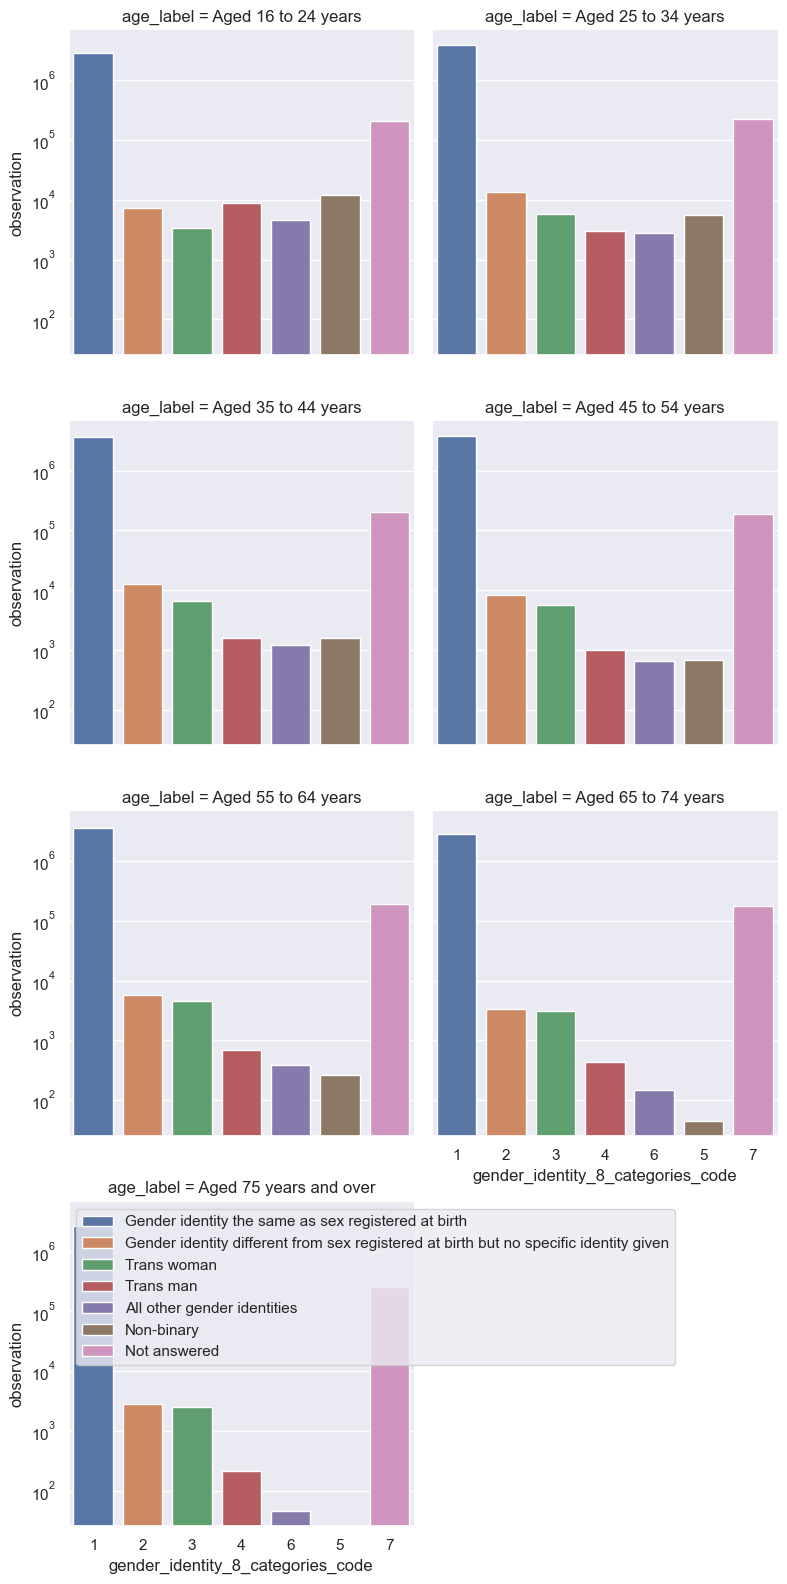

In [177]:
# Create a FacetGrid with subplots for each unique value in the 'age_label' column
g = sns.FacetGrid(female, col='age_label', col_wrap=2, height=4, aspect=1, hue = 'gender_identity_8_categories_label')
g.map(sns.barplot, 'gender_identity_8_categories_code', 'observation', order=female['gender_identity_8_categories_code'].unique())
plt.yscale("log")
plt.legend(loc = 'upper left')

In [178]:
stacked_data = female.pivot_table(index='age_label', columns='gender_identity_8_categories_code', values='group_pct', aggfunc='sum')

In [179]:
stacked_data

gender_identity_8_categories_code,1,2,3,4,5,6,7
age_label,,,,,,,
Aged 16 to 24 years,92.25,0.23,0.11,0.28,0.39,0.15,6.59
Aged 25 to 34 years,93.87,0.32,0.14,0.07,0.14,0.07,5.39
Aged 35 to 44 years,94.20,0.32,0.16,0.04,0.04,0.03,5.21
Aged 45 to 54 years,94.86,0.20,0.14,0.03,0.02,0.02,4.74
Aged 55 to 64 years,94.64,0.15,0.12,0.02,0.01,0.01,5.05
Aged 65 to 74 years,94.01,0.11,0.10,0.01,0.00,0.00,5.76
Aged 75 years and over,91.07,0.10,0.09,0.01,0.00,0.00,8.74


In [180]:
# Our observation column contains some string values, so let's convert it to numeric

age_sex['observation'] = pd.to_numeric(age_sex['observation'], errors='coerce')

# Let's calculate the percentage of each observation value within each age group
# We'll store the results in a new column titled 'group_pct'

age_sex['group_pct'] = age_sex.groupby(['age_label', 'sex_code'])['observation'].apply(lambda x: x / x.sum() * 100).round(2)

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_87427/3761084023.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  age_sex['group_pct'] = age_sex.groupby(['age_label', 'sex_code'])['observation'].apply(lambda x: x / x.sum() * 100).round(2)


In [181]:
age_sex.head()

,gender_identity_8_categories_code,gender_identity_8_categories_label,sex_code,sex_label,age_code,age_label,observation,group_pct
0,1,Gender identity the same as sex registered at ...,1,Female,1,Aged 16 to 24 years,2874920.0,92.25
1,2,Gender identity different from sex registered ...,1,Female,1,Aged 16 to 24 years,7220.0,0.23
2,3,Trans woman,1,Female,1,Aged 16 to 24 years,3380.0,0.11
3,4,Trans man,1,Female,1,Aged 16 to 24 years,8755.0,0.28
4,6,All other gender identities,1,Female,1,Aged 16 to 24 years,4590.0,0.15


In [182]:
age_sex.dtypes

gender_identity_8_categories_code       int64
gender_identity_8_categories_label     object
sex_code                                int64
sex_label                              object
age_code                                int64
age_label                              object
observation                           float64
group_pct                             float64
dtype: object

In [183]:
import re

def shorten_age(age_column):
    age_range = re.findall(r'\d+', age_column)
    if age_range and len(age_range) >= 2:
        return f"{age_range[0]}-{age_range[1]}"
    return age_column

# Apply the function to the age_label column
age_sex['age_label'] = age_sex['age_label'].apply(shorten_age)


# # Let's get a closer look at non_response rates

not_ans = age_sex[age_sex.gender_identity_8_categories_label == 'Not answered']
not_ans = age_sex.loc[age_sex.age_label == 'Aged 75 years and over', 'age_label'] = '75+'

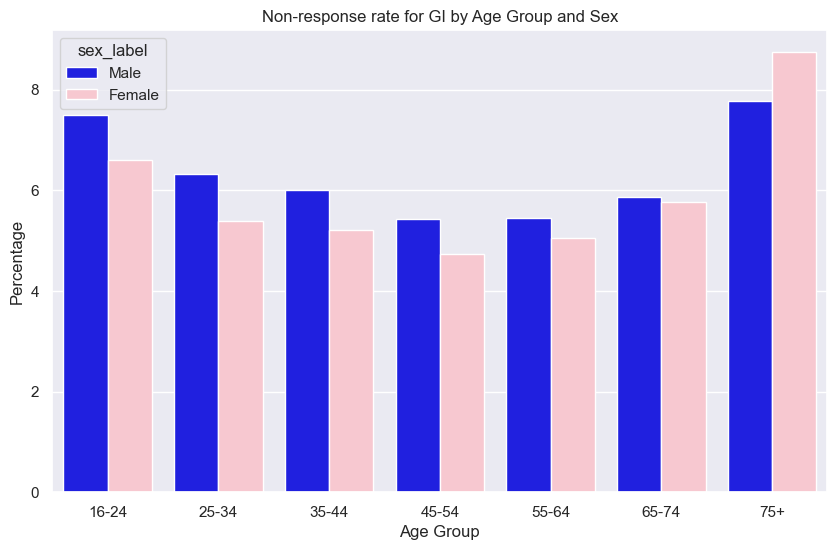

In [184]:
# Let's get a closer look at non_response rates

not_ans = age_sex[age_sex.gender_identity_8_categories_label == 'Not answered']
# Create the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x = 'age_label', y = 'group_pct', hue = "sex_label", hue_order = ['Male','Female'],palette={'Male': 'blue', 'Female': 'pink'}, data = not_ans)
# Customize the chart
plt.title('Non-response rate for GI by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.show()

In [187]:
# Let's get a closer look at non_response rates

not_ans = female[female.gender_identity_8_categories_label == 'Not answered']

## Ignore beyond...

In [ ]:
lang.sort_values(by = ['LA_code'], ascending = [True])

In [ ]:
lang[(lang['LA_name'] == 'Merthyr Tydfil') & (lang['Non-English'] == True)]

In [ ]:
b = lang.sort_values(by = ['LA_code', 'Percentages'], ascending = [True,False])

In [ ]:
b[b['Non-English'] == True]

In [ ]:
lang['Non-English'] = (lang['ML_code'] != 1) & (lang['ML_code'] != -8)

In [ ]:
non_english_pct = lang.groupby(['LA_code', 'LA_name']).agg({'Non-English': 'mean'}).reset_index()

In [ ]:
non_english_pct

In [ ]:
lang.groupby(['LA_code', 'LA_name']).agg({'Non-English': sum})

In [ ]:
non_english_pct

In [ ]:
lang

In [ ]:
# Let's try and merge both datasets - GI (df) and LANG (lang)

# Merge the data
merged_df = pd.merge(not_ans, lang, on='LA_code')

pivot_df = merged_df.pivot_table(values='Observation_y', index='LA_code', columns='ML_categories', aggfunc='sum')

# Let's get rid of Percentages column
merged_df = merged_df.drop('Percentages', axis = 1)

# Snapshot of the data
merged_df.head(10)

In [ ]:
la_names = b.LA_name.unique().tolist()

In [ ]:
merged_df.sort_values(by = 'Observation_y', ascending = False).head(50)

In [ ]:
# Out of interest, let's sort the data by Observation_y for each LA_code

c = []

for i in merged_df.LA_name_x.unique():
    b = merged_df[merged_df.LA_name_x == i].sort_values(by='Observation_y', ascending = False)
    
b

In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
display(merged_df.sort_values(by = ['LA_code', 'Observation_y'], ascending = [True,False]))

In [ ]:
stockport = merged_df[merged_df.LA_name_x == 'Stockport']

grouped = stockport.groupby(['ML_categories'])

In [ ]:
stockport

In [ ]:
stockport['non_response_rate'] = stockport['Observation_y'] / stockport['Observation_y'].sum() * 100

In [ ]:
non_response_rate

In [ ]:
stockport.sort_values(by = ['non_response_rate'], ascending = False)

In [ ]:
stockport[2:300].plot(kind = 'scatter', x = 'ML_code', y = 'non_response_rate')

In [ ]:
# Group the data by language category

# grouped_df = merged_df.groupby(['ML_categories'])

# grouped_df.head()

In [ ]:
grouped_df.tail()[:2]

# Other interesting stuff...

## Percentage-wise

In [190]:
df['Region'] = ''

regions = {
    'East':'Babergh,Basildon,Bedford,Braintree,Breckland,Broadland,Broxbourne,Cambridge,Castle Point,Central Bedfordshire,Chelmsford,Colchester,Dacorum,East Cambridgeshire,East Hertfordshire,East Suffolk,Epping Forest,Fenland,Great Yarmouth,Harlow,Hertsmere,Huntingdonshire,Ipswich,Kings Lynn and West Norfolk,Maldon,Mid Suffolk,North Hertfordshire,North Norfolk,Norwich,Peterborough,Rochford,South Cambridgeshire,South Norfolk,Southend-on-Sea,St. Albans,Stevenage,Tendring,Three Rivers,Thurrock,Uttlesford,West Suffolk'.split(","),
    'East Midlands':'Amber Valley,Ashfield,Bassetlaw,Blaby,Bolsover,Boston,Broxtowe,Charnwood,Chesterfield,Derby,Derbyshire Dales,East Lindsey,Erewash,Gedling,Harborough,High Peak,Hinckley and Bosworth,Leicester,Lincoln,Mansfield,Melton,Newark and Sherwood,North East Derbyshire,North Kesteven,North West Leicestershire,North Northamptonshire,Nottingham,Oadby and Wigston,Rushcliffe,Rutland,South Derbyshire,South Holland,South Kesteven,West Lindsey,West Northamptonshire'.split(","),
    'North East':'County Durham,Darlington,Gateshead,Hartlepool,Middlesbrough,Newcastle upon Tyne,North Tyneside,Northumberland,Redcar and Cleveland,South Tyneside,Stockton-on-Tees,Sunderland'.split(","),
    'North West':'Allerdale,Barrow-in-Furness,Blackburn with Darwen,Blackpool,Bolton,Burnley,Bury,Carlisle,Cheshire East,Cheshire West and Chester,Chorley,Copeland,Eden,Fylde,Halton,Hyndburn,Knowsley,Lancaster,Liverpool,Manchester,Oldham,Pendle,Preston,Ribble Valley,Rochdale,Rossendale,Salford,Sefton,South Lakeland,South Ribble,St. Helens,Stockport,Tameside,Trafford,Warrington,West Lancashire,Wigan,Wirral,Wyre'.split(","),
    'South East':'Folkestone and Hythe,Adur,Arun,Ashford,Basingstoke and Deane,Bracknell Forest,Brighton and Hove,Buckinghamshire,Canterbury,Cherwell,Chichester,Crawley,Dartford,Dover,East Hampshire,Eastbourne,Eastleigh,Elmbridge,Epsom and Ewell,Fareham,Folkestone & Hythe,Gosport,Gravesham,Guildford,Hart,Hastings,Havant,Horsham,Isle of Wight,Lewes,Maidstone,Medway,Mid Sussex,Milton Keynes,Mole Valley,New Forest,Oxford,Portsmouth,Reading,Reigate and Banstead,Rother,Runnymede,Rushmoor,Sevenoaks,Shepway,Slough,South Oxfordshire,Southampton,Spelthorne,Surrey Heath,Swale,Tandridge,Test Valley,Thanet,Tonbridge and Malling,Tunbridge Wells,Vale of White Horse,Waverley,Wealden,West Berkshire,West Oxfordshire,Winchester,Windsor and Maidenhead,Woking,Wokingham,Worthing'.split(","),
    'South West':'Bath and North East Somerset,Bournemouth,Christchurch and Poole,Bristol,Cheltenham,Cornwall,Cotswold,Dorset,East Devon,Exeter,Forest of Dean,Gloucester,Mendip,Mid Devon,North Devon,North Somerset,Plymouth,Sedgemoor,Somerset West and Taunton,South Gloucestershire,South Hams,South Somerset,Stroud,Swindon,Teignbridge,Tewkesbury,Torbay,Torridge,West Devon,Wiltshire,Isles of Scilly'.split(","),
    'West Midlands':'Birmingham,Bromsgrove,Cannock Chase,Coventry,Dudley,East Staffordshire,Herefordshire,Lichfield,Malvern Hills,Newcastle-under-Lyme,North Warwickshire,Nuneaton and Bedworth,Redditch,Rugby,Sandwell,Shropshire,Solihull,South Staffordshire,Stafford,Staffordshire Moorlands,Stoke-on-Trent,Stratford-on-Avon,Tamworth,Telford and Wrekin,Walsall,Warwick,Wolverhampton,Worcester,Wychavon,Wyre Forest'.split(","),
    'Yorkshire and the Humber':'Kingston upon Hull,Barnsley,Bradford,Calderdale,Craven,Doncaster,East Riding of Yorkshire,Hambleton,Harrogate,Kingston Upon Hull,Kirklees,Leeds,North East Lincolnshire,North Lincolnshire,Richmondshire,Rotherham,Ryedale,Scarborough,Selby,Sheffield,Wakefield,York'.split(","),
    'London':'St Albans,Brentwood,Watford,Welwyn Hatfield,Luton,City of London,Westminster,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth'.split(","),
    'Wales':'Isle of Anglesey,Gwynedd,Conwy,Denbighshire,Flintshire,Wrexham,Ceredigion,Pembrokeshire,Carmarthenshire,Swansea,Neath Port Talbot,Bridgend,Vale of Glamorgan,Cardiff,Rhondda Cynon Taf,Caerphilly,Blaenau Gwent,Torfaen,Monmouthshire,Newport,Powys,Merthyr Tydfil'.split(",")} 


df['Region'] = ''

for region, locations in regions.items():
    for location in locations:
        res = df[df['LA_name'] == location]
        df.loc[res.index, 'Region'] = region
        
index = df[df.LA_name == "Bournemouth, Christchurch and Poole"].index
        
for i in index:
    df.Region[i] = 'South West'
#         row['Region'] = 'South West'
# #     if row['LA_name'] == "King's Lynn and Werst Norfolk":
# #         row['Region'] == 'East'

index = df[df.LA_name == "King's Lynn and West Norfolk"].index

for i in index:
    df.Region[i] = 'East'

# for row in df:
#     print(row)

KeyError: 'LA_name'

In [196]:
df = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/gi_renamed.csv')

In [197]:
df.GI_categories.unique()

array(['Does not apply',
       'Gender identity the same as sex registered at birth',
       'Gender identity different from sex registered at birth but no specific identity given',
       'Trans woman', 'Trans man', 'All other gender identities',
       'Not answered'], dtype=object)

In [198]:
No_spec = df[df['GI_categories'] == 'Gender identity different from sex registered at birth but no specific identity given'].sort_values(by = 'Percentages', ascending = False)

KeyError: 'Percentages'

In [ ]:
No_spec.tail(10)

### Trans-men top LAs

In [ ]:
lang.head()

In [193]:
trans_men = df[df['GI_categories'] == 'Trans man'].sort_values(by = 'Percentages', ascending = False)

KeyError: 'GI_categories'

In [194]:
trans_men.head(10)

NameError: name 'trans_men' is not defined

In [ ]:
trans_men.tail(10)

### Trans-women top LAs

In [ ]:
trans_women = df[df['GI_categories'] == 'Trans woman'].sort_values(by = 'Percentages', ascending = False)

trans_women.head(10)

In [195]:
trans_women.tail(10)

NameError: name 'trans_women' is not defined

In [ ]:
df.Region.value_counts()

In [ ]:
### Gender

In [ ]:
non_eng = lang.ML_code.unique()[2:].tolist()

li = []


for i in lang.ML_code:
    if i in non_eng:
        i = 2
        li.append(i)
        
li

In [ ]:
# Aggregate non-English categories

non_eng2 = lang.ML_categories.unique()[2:].tolist()

In [ ]:
lang.ML_code = [2 if i in non_eng else i for i in lang.ML_code]
lang.ML_categories = ['Non-English' if i in non_eng2 else i for i in lang.ML_categories]

In [ ]:
lang.ML_categories.value_counts()